In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from satellite_pipeline import SatellitePipeline

pipeline = SatellitePipeline()

In [2]:
import ipywidgets as widgets
from IPython.display import display

files = pipeline.get_file_list()
file_dropdown = widgets.Dropdown(options=files, description='File:')
display(file_dropdown)

filename = file_dropdown.value
sat_id = pipeline.identify_satellite(filename)
filename

Dropdown(description='File:', options=('1kuns_pf.wav', 'aalto1.wav', 'aausat_4.wav', 'aisat.wav', 'aistechsat3…

'1kuns_pf.wav'

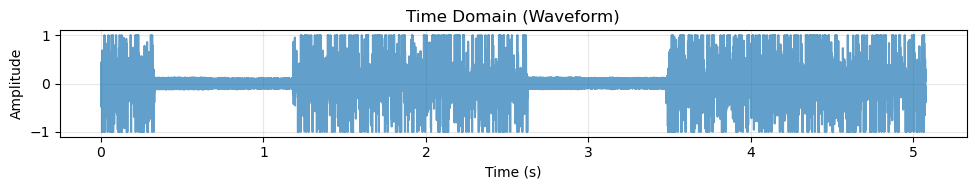

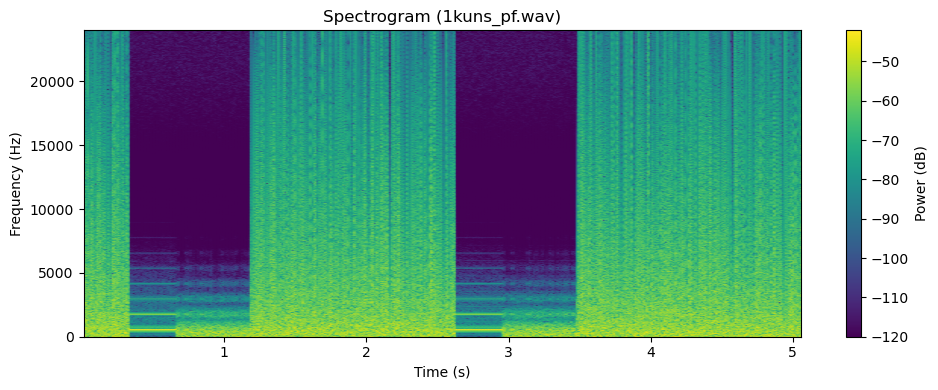

In [3]:
# Load and Plot
fs, data = pipeline.load_signal(filename)
duration = len(data) / fs

# 1. Time Domain
fig_time, ax_time = plt.subplots(figsize=(10, 2))
t = np.arange(len(data)) / fs
ax_time.plot(t, data, alpha=0.7)
ax_time.set_title("Time Domain (Waveform)")
ax_time.set_xlabel("Time (s)")
ax_time.set_ylabel("Amplitude")
ax_time.grid(True, alpha=0.3)
plt.tight_layout()

# 2. Frequency Domain (Spectrogram)
fig_spec, ax_spec = plt.subplots(figsize=(10, 4))
# nperseg affects frequency resolution. Higher = finer freq, coarser time.
f, t_spec, Sxx = signal.spectrogram(data, fs, nperseg=1024, noverlap=512)
Sxx_log = 10 * np.log10(Sxx + 1e-12)

c = ax_spec.pcolormesh(t_spec, f, Sxx_log, shading='gouraud', cmap='viridis')
ax_spec.set_title(f"Spectrogram ({filename})")
ax_spec.set_ylabel("Frequency (Hz)")
ax_spec.set_xlabel("Time (s)")
plt.colorbar(c, ax=ax_spec, label='Power (dB)')
plt.tight_layout()

# Educational Text based on signal
obs_text = ""
if "ao73" in filename:
    obs_text = "Notice the continuous narrow line? That's the **BPSK** carrier. The wiggles are Doppler shift (though this clip is short)."
elif "gomx" in filename:
    obs_text = "Notice the wider bursts? That's high-speed **9k6 FSK**. It looks like 'blocks' of energy."
elif "lilacsat" in filename:
    obs_text = "LilacSat uses **BPSK**. If it's the image file, you might see a continuous data stream."

In [4]:
result = pipeline.decode(filename, sat_id)

Running decoder: pixi run gr_satellites 1KUNS-PF --wavfile satellite-recordings/1kuns_pf.wav


In [5]:
result

{'success': False,
 'satellite': '1KUNS-PF',
 'stdout': '',
 'stderr': "[Errno 2] No such file or directory: 'pixi'"}

In [18]:
print(result['stdout'])

-> Packet from 1k2 FSK downlink
Container: 
    csp_header = Container: 
        priority = 2
        source = 1
        destination = 9
        destination_port = 10
        source_port = 37
        reserved = 0
        fragmentation = False
        hmac = False
        xtea = False
        rdp = False
        crc = False
    beacon_counter = 4274
    solar_panel_voltage = ListContainer: 
        2448.0
        2448.0
        2432.0
    eps_temp = ListContainer: 
        1.0
        3.0
        2.0
        2.0
    eps_boot_cause = 7
    eps_batt_mode = 3
    solar_panel_current = 0.0
    system_input_current = 80.0
    battery_voltage = 8262.0
    radio_PA_temp = 4.0
    tx_count = 45584
    rx_count = 0
    obc_temp = ListContainer: 
        1.0
        1.0
    ang_velocity_mag = 10
    magnetometer = ListContainer: 
        288.0
        0.0
        0.0
    main_axis_of_rot = 89
-> Packet from 1k2 FSK downlink
Container: 
    csp_header = Container: 
        priority = 2
        sou